In [5]:
import os

os.chdir('app/')

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
def form_param_string(extra_params: pd.Series):
    param_string = ', '

    for param_name in extra_params.index:
        param_string += f'{param_name}={extra_params[param_name]}, '

    param_string = param_string[:-2]
    return param_string

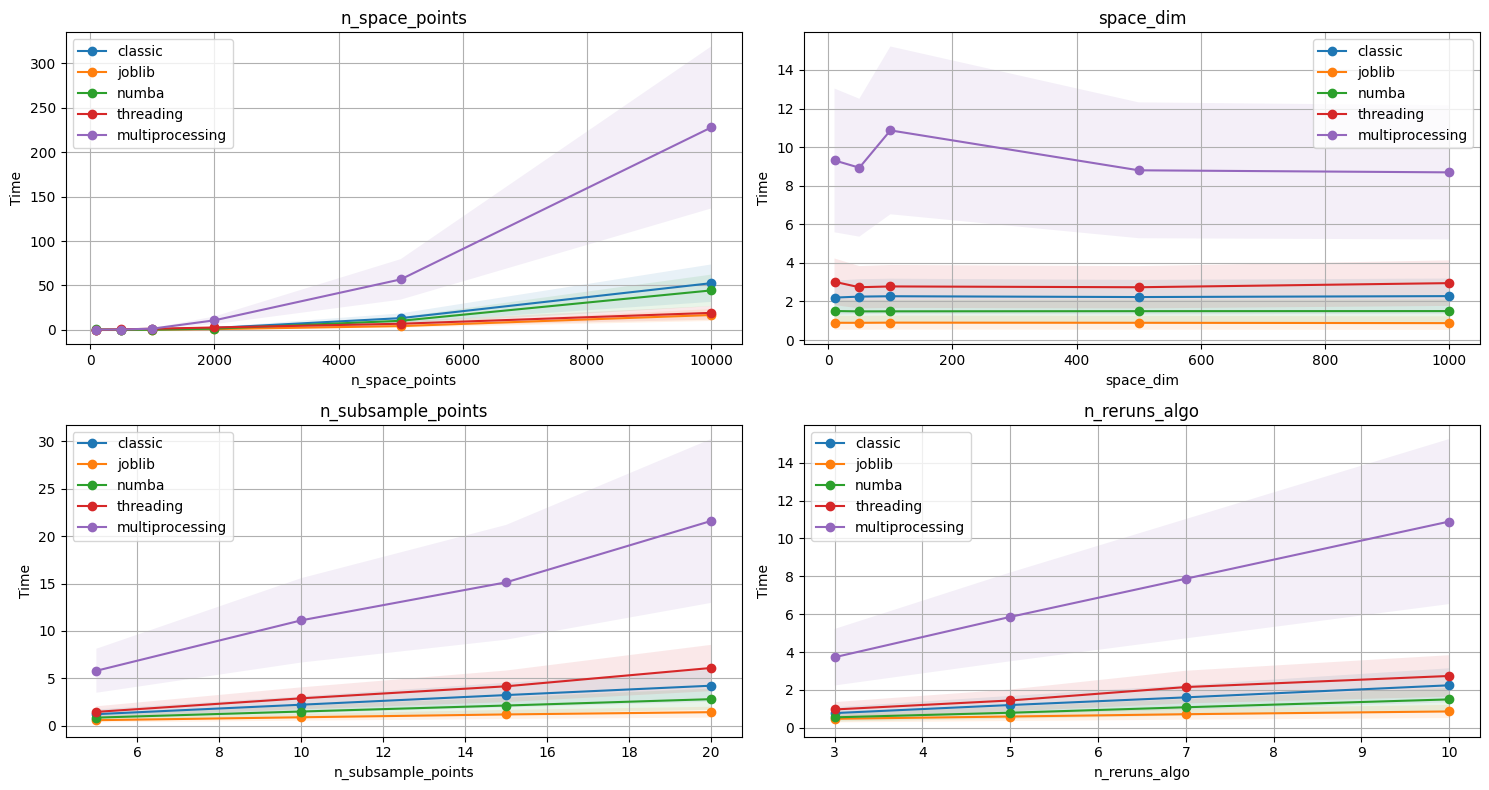

In [28]:
experiment_name = 'yugay'

fig, axes = plt.subplots(2, 2, figsize=(15, 8))
params = ['n_space_points', 'space_dim', 'n_subsample_points',  'n_reruns_algo',]
methods = [
    'classic', 
    'joblib', 
    'numba', 
    'threading',
    'multiprocessing'
]

for param, ax in zip(params, axes.flatten()):
    for method in methods:
        results = pd.read_csv(f'results/{experiment_name}_{param}_{method}.csv')
        
        extra_params = results.iloc[0][params].drop(param)
        
        ax.plot(results[param], results['time_mean'], label=method, marker='o')

        stderr = results['time_mean'] / results['n_rerun_time']

        ax.fill_between(results[param], results['time_mean'] - 2*stderr, results['time_mean'] + 2*stderr, alpha=.1)

    ax.set_title(param)
    ax.set_xlabel(param)
    ax.set_ylabel('Time')
    ax.grid()
    ax.legend()

plt.tight_layout()
plt.show()